In [24]:
# Установка библиотеки PyTorch.
!pip3 install torch

In [25]:
import torch
print(torch.__version__)

2.9.0+cpu


# Обучение нейронной сети

In [26]:
!pip3 install scikit-learn

In [27]:
import sklearn
from sklearn import datasets

In [28]:
# датасет «Ирисы Фишера»
data = datasets.load_iris()

In [29]:
# X - характеристики цветков Ириса
X = torch.tensor(data['data'], dtype=torch.float32)

# y - классы цветков Ириса
y = torch.tensor(data['target'], dtype=torch.long)

In [30]:
#       разделение данных на обучающую и тестовую выборку
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split ( X, y, test_size=0.2, random_state=42)


In [31]:
from collections import OrderedDict

model = torch.nn.Sequential(
    OrderedDict([
        ("linear_1", torch.nn.Linear(4, 10)),
        ("activation_1", torch.nn.ReLU()),
        ("linear_2", torch.nn.Linear(10, 3)),
        ("log_softmax", torch.nn.LogSoftmax(dim=1)),
    ])
)

model = model.to(dtype=X.dtype)

In [32]:
model

Sequential(
  (linear_1): Linear(in_features=4, out_features=10, bias=True)
  (activation_1): ReLU()
  (linear_2): Linear(in_features=10, out_features=3, bias=True)
  (log_softmax): LogSoftmax(dim=1)
)

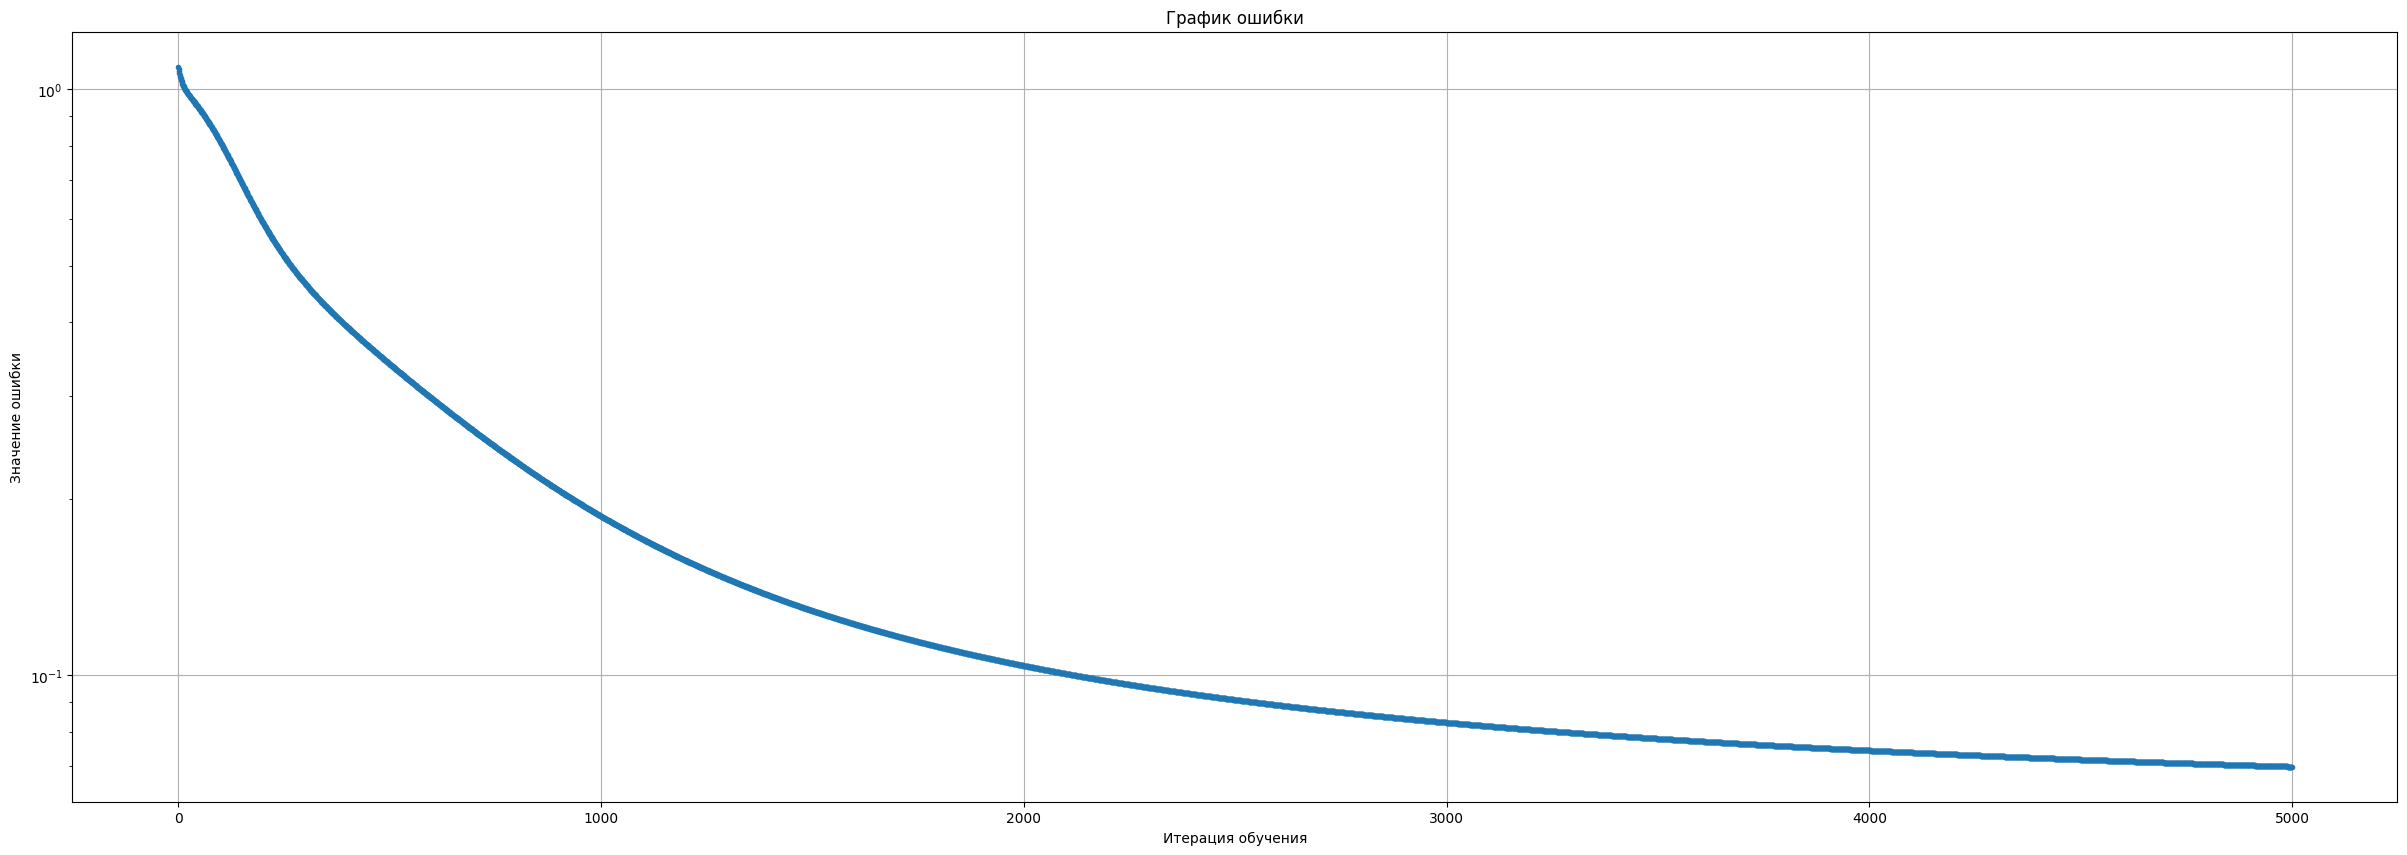

In [33]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

num_epochs = 5000

optimizer = torch.optim.SGD(
    model.parameters(),
    lr=0.01
)

# функция потерь
loss_fn = torch.nn.NLLLoss()

losses = []

test_accuracy_history = []

for epoch in range(1, num_epochs + 1):

    optimizer.zero_grad()

    # предсказание модели для объектов из матрицы X
    pred = model(X_train)

    # суммарные потери для предсказанных значений из pred
    loss = loss_fn(pred, y_train)

    # градиенты
    loss.backward()

    # оптимизация
    optimizer.step()

    losses.append(loss.item())

    with torch.no_grad():
      test_preds = model.forward(X_test)
      accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
      test_accuracy_history.append(accuracy)

    if epoch % 100 == 0:
        clear_output(True)
        fig, ax = plt.subplots(figsize=(30, 10))
        plt.title("График ошибки")
        plt.plot(losses, ".-")
        plt.xlabel("Итерация обучения")
        plt.ylabel("Значение ошибки")
        plt.yscale("log")
        plt.grid()
        plt.show()

## Получение предсказания на тестовой выборке



In [34]:
log_probs = model(X_test)

pred_class_probs = log_probs.exp()

pred_class = torch.argmax(log_probs, dim=1)

#### Ответ на тестовой выборке

In [35]:
print(pred_class)

tensor([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2,
        2, 2, 2, 2, 0, 0])


In [36]:
accuracy = (pred_class == y_test).float().mean().item()
print(f"Точность на выборке: {accuracy:.4f} ({accuracy*100:.2f}%)")

Точность на выборке: 1.0000 (100.00%)


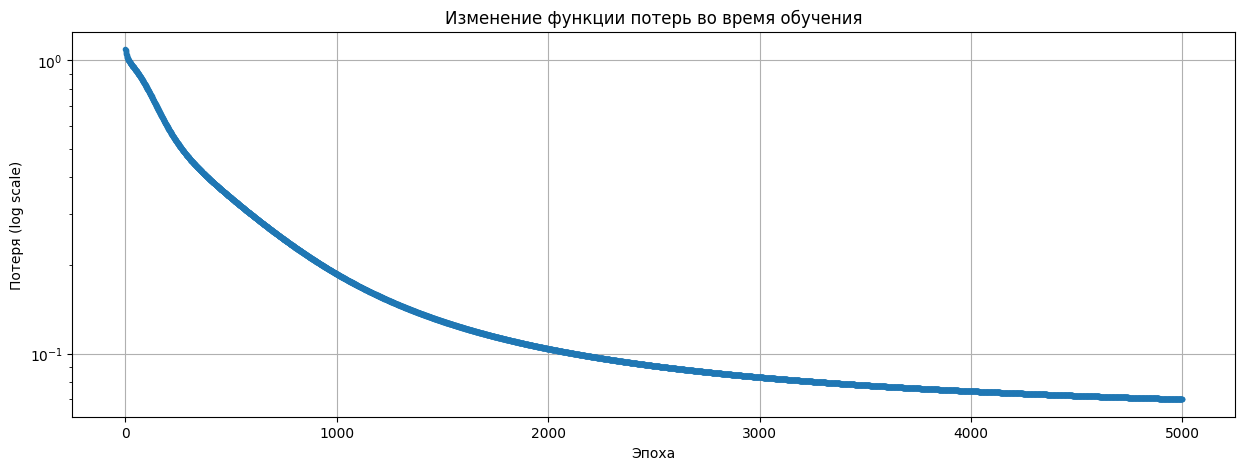

In [37]:
# График изменения ошибки во время обучения
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(losses, ".-")
plt.title("Изменение функции потерь во время обучения")
plt.xlabel("Эпоха")
plt.ylabel("Потеря (log scale)")
plt.yscale("log")
plt.grid()
plt.show()


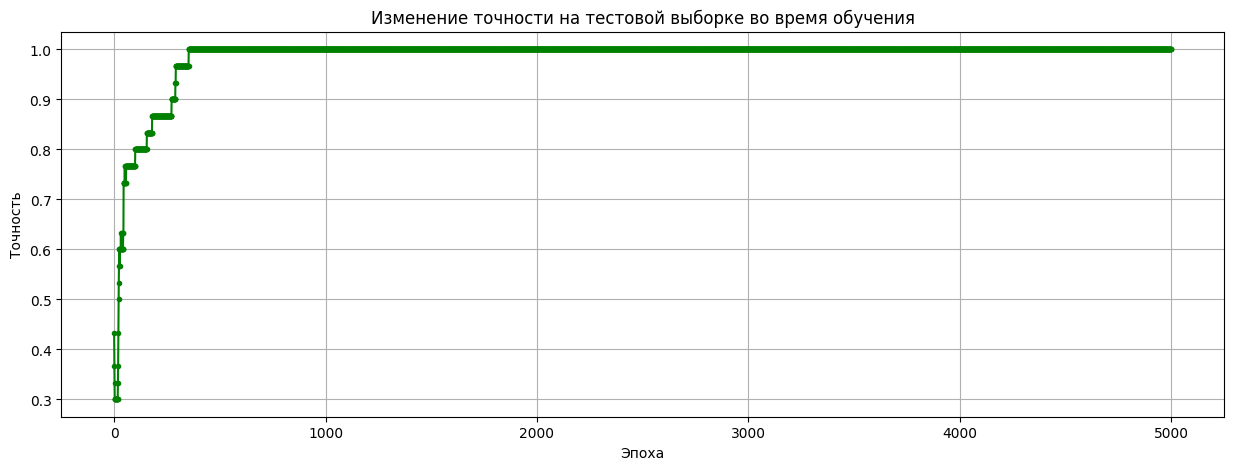

In [38]:
# График изменения точности на тестовой выборке
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(test_accuracy_history, ".-", color='green')
plt.title("Изменение точности на тестовой выборке во время обучения")
plt.xlabel("Эпоха")
plt.ylabel("Точность")
plt.grid()
plt.show()